In [1]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# show plots inside notebook
%matplotlib inline

print("Libraries imported successfully")

Libraries imported successfully


In [3]:
# Load Titanic dataset

df = sns.load_dataset("titanic")

# Show first 5 rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Shape of dataset
print("Dataset shape:", df.shape)

# Column names
print("\nColumns:")
print(df.columns)

# Dataset info
print("\nDataset info:")
print(df.info())

# Missing values
print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (891, 15)

Columns:
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive 

In [5]:
# Fill age with median
df["age"] = df["age"].fillna(df["age"].median())

# Fill embarked with most frequent value
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

# Fill embark_town also (you still have 2 missing values)
df["embark_town"] = df["embark_town"].fillna(df["embark_town"].mode()[0])

# Drop deck column
df = df.drop(columns=["deck"])

print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [6]:
# Create new feature: family size

df["family_size"] = df["sibsp"] + df["parch"] + 1

# Show new column
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1


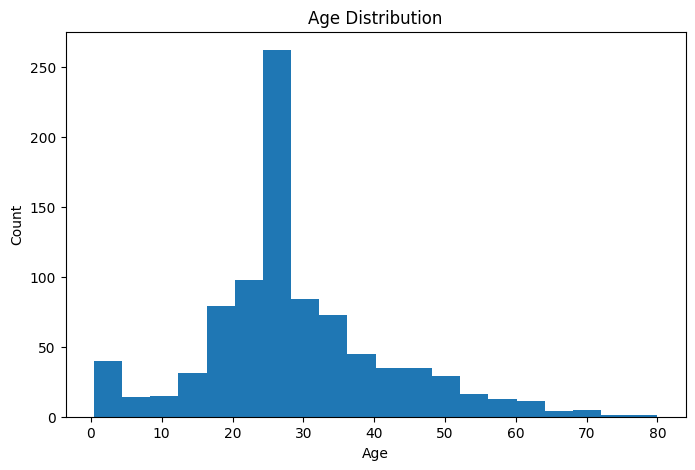

In [7]:
plt.figure(figsize=(8,5))

plt.hist(df["age"], bins=20)

plt.title("Age Distribution")

plt.xlabel("Age")

plt.ylabel("Count")

plt.show()

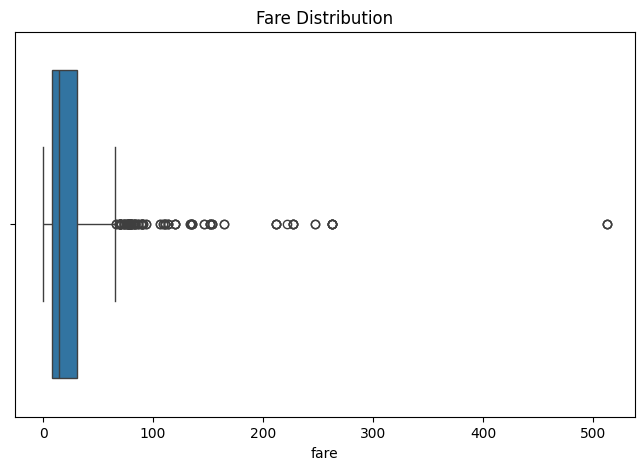

In [8]:
plt.figure(figsize=(8,5))

sns.boxplot(x=df["fare"])

plt.title("Fare Distribution")

plt.show()

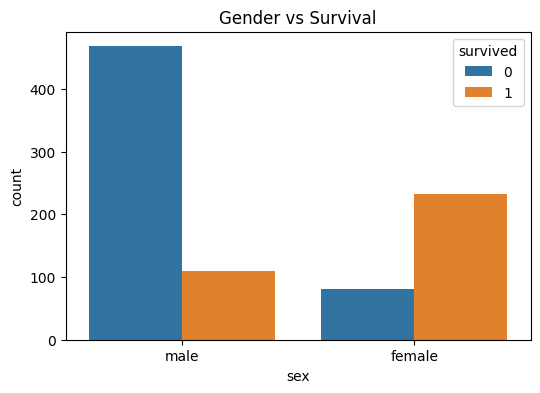

In [9]:
plt.figure(figsize=(6,4))

sns.countplot(x="sex", hue="survived", data=df)

plt.title("Gender vs Survival")

plt.show()

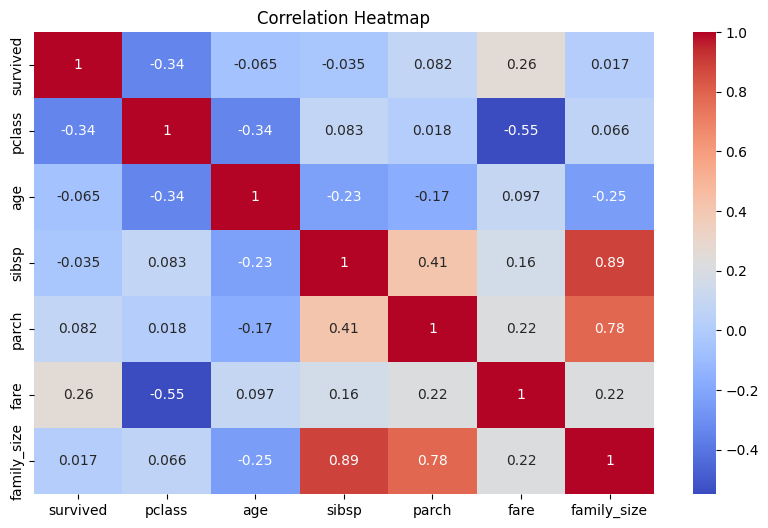

In [10]:
# select only numeric columns

numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(10,6))

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap")

plt.show()

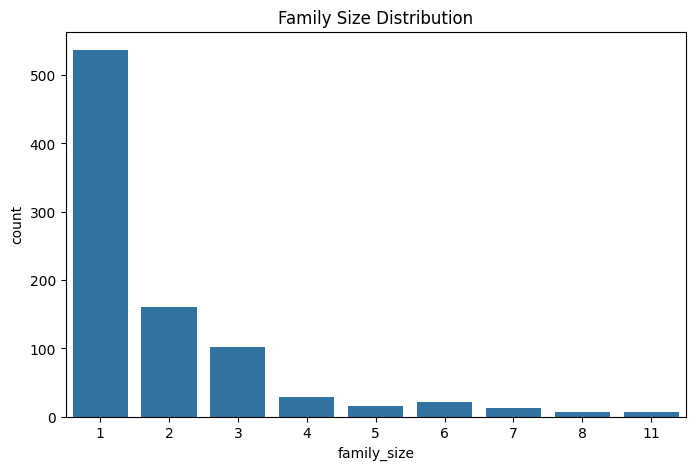

In [11]:
plt.figure(figsize=(8,5))

sns.countplot(x="family_size", data=df)

plt.title("Family Size Distribution")

plt.show()

In [12]:
# Fill missing values safely (NO warning)

df["age"] = df["age"].fillna(df["age"].median())

df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

df["embark_town"] = df["embark_town"].fillna(df["embark_town"].mode()[0])


# Drop deck column ONLY if exists

if "deck" in df.columns:
    df = df.drop(columns=["deck"])


print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
family_size    0
dtype: int64
